20.5 35.0 mean= 29.962962962962962 median= 25.0 IQR= 14.5


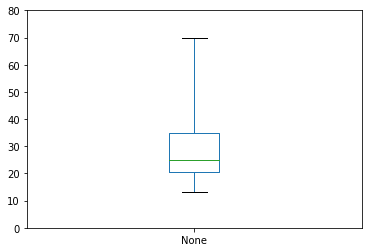

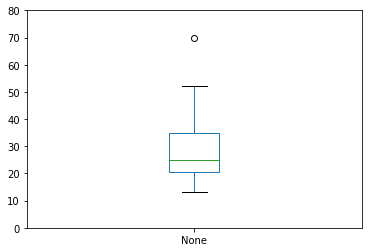

In [1]:
####Question 1
###the method pandas uses for quantile calculation is method 2 from
###https://en.wikipedia.org/wiki/Quartile
###there are different ways of computing quantiles/quartiles

import pandas as pd
import matplotlib.pyplot as plt

x=[13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70]
s=pd.Series(x)
q1=s.quantile(.25)
q3=s.quantile(.75)
iqr = q3-q1
print(q1,q3,"mean=",s.mean(),"median=",s.median(),"IQR=",iqr)


# set whis to 'range' to enforce the whiskers be the min and max
s.plot(kind='box',whis='range',ylim=(0,80))
plt.show()
# by default whiskers is 1.5*IQR
s.plot(kind='box',ylim=(0,80))

plt.show()




In [2]:
#####Question 2

x=[1,2,3,4,5, 13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70, 70, 300, 900, 10000]
dat=pd.Series(x)
themedian=s.median()
q1=dat.quantile(.25)
q3=dat.quantile(.75)
iqr=q3-q1
print("Q1:", q1, "Q3:", q3, "IQR:", iqr,"\n")

suspected=dat[(dat > q3+1.5*iqr) | (dat < q1-1.5*iqr)]
outliers=dat[(dat > q3+3*iqr) | (dat < q1-3*iqr)]
print("Suspected:", suspected.values)
print("Suspected:", outliers.values)






Q1: 18.25 Q3: 37.0 IQR: 18.75 

Suspected: [   70    70   300   900 10000]
Suspected: [  300   900 10000]


3) 

Method 1
Original x: 22.0 2.0 3.0 1.0 42.0 nan 10.0 nan
Original y: nan 16.0 nan 17.0 20.0 0.0 36.0 8.0
New x: 22.0 2.0 3.0 1.0 42.0 13.3333333333 10.0 13.3333333333
New y: 16.1666666667 16.0 16.1666666667 17.0 20.0 0.0 36.0 8.0
Distance: 45.0067896112

Method 2
Distance: 80.2994395995

Mean Imputation
pros:
easy to implement
appliable to most of the case where data are normally or close to normally distributed
cons:
assume data are skewed around the mean value, while in reality the data distribution may be more complex
Scaling
pros:
slightly more efficient, since less data are used for distance computation
no assmupation on the distribution of data, aviod shortcomes of mean imputation
cons:
lose information, some data are discarded because of the corresponding entries are missing in the other vector
note both methods cannot work well with datasets have a large amount of missing data. In this case, obtaining more data might be a better option, instead of fiiling missing values with limited information

Misleading results
too much missing entries
missing values only occur on the parts that are far different from the majority of data


In [31]:
##Q8)


smoke=pd.read_csv('smoking-info-corrected.csv',encoding = 'ISO-8859-1')
Alaska2=smoke.loc[smoke['State']=="Alaska"]
Alaska=Alaska2.replace('%','',regex=True)
Alaska[['Smoke everyday','Smoke some days','Former smoker','Never smoked']] = Alaska[['Smoke everyday','Smoke some days','Former smoker','Never smoked']].apply(pd.to_numeric)

Alaska.plot.scatter('Year','Smoke everyday')
Alaska.plot.scatter('Year','Smoke some days')
Alaska.plot.scatter('Year','Former smoker')
Alaska.plot.scatter('Year','Never smoked')
plt.show()

